In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
import json
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Препроцессинг

In [27]:
link = '/Users/mikhail/Desktop/Парсер/Копия Core_props_field_F_итог_.xls' #link to data

data = pd.read_excel(link, index_col=0)
df = data

df = df.loc[df['Учтенные'] != 'Скол'] #удаление знач.
df = df.loc[df['Учтенные'] != 'Трещина']
df.replace(-999.25, 0, inplace=True) #замена значений

num_well = 'F3.' #номер скважины # потом заменить на input("Номер скважины: ")

por = df.loc[num_well, "Открыт."].values #массив
perm_hor = df.loc[num_well, 'Проницаемость.'].values #массив
perm_vert = df.loc[num_well, 'Unnamed: 11'].values #массив
carb = df.loc[num_well, 'Карбонат-'].values #массив
water_sat = df.loc[num_well, 'Водонас-'].values #массив
dens_dry = df.loc[num_well, 'Плотн.'].values #массив
dens_wet = df.loc[num_well, 'Плотн..1'].values #массив #плотность c флюидом
dens_matr = df.loc[num_well, 'Плотн..2'].values #массив #плотность матрицы
del_inf = df.loc[num_well, 'Учтенные'].values #массив  #скол/трещина
lit = df.loc[num_well, 'Литология'].values #массив
h = df.loc[num_well, 'h'].values #массив


# Lorenz plot

Text(0.5, 1.0, 'Lorenz plot (sorted)')

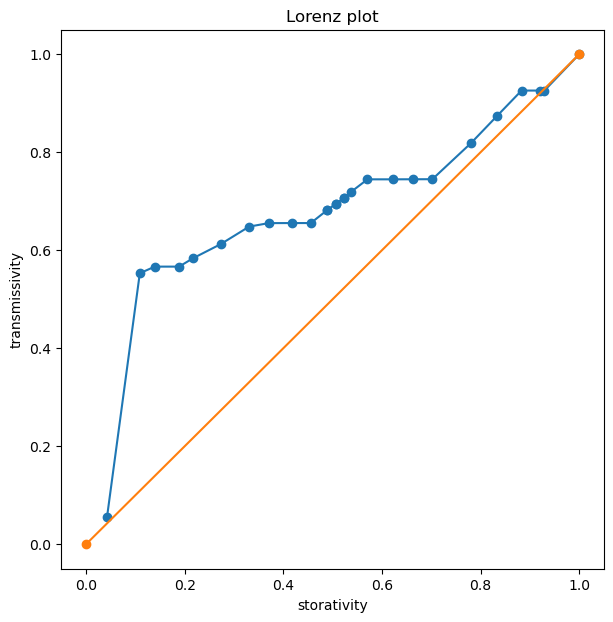

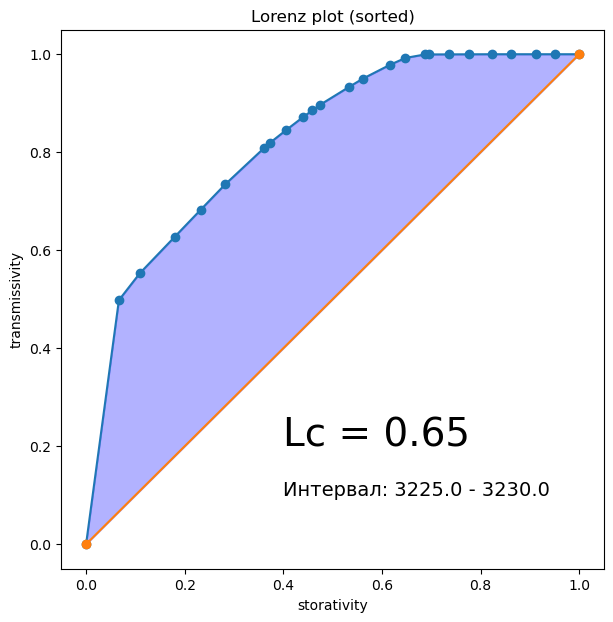

In [80]:
######НЕСОРТИРОВАННЫЙ ГРАФИК ЛОРЕНЦА##########
#блок матеши (Лоренц)

df_1 = pd.read_excel(link, index_col=0)

df_1 = df_1.loc[df_1['Проницаемость.'] != -999.25]
df_1 = df_1.loc[df_1['Учтенные'] != 'Скол'] #удаление знач.
df_1 = df_1.loc[df_1['Учтенные'] != 'Трещина']
df_1.replace(-999.25, 0, inplace=True) #замена значений

num_well = input("Номер скважины: ")

###БЛОК ФИЛЬТРАЦИИ ПО ГЛУБИНЕ####
H = df_1.loc[num_well, "Интервал"] + df_1.loc[num_well, "Место"]
df_1 = df_1.loc[num_well]

df_1 = pd.concat([df_1, H],axis = 1) #объединение датафреймов

H_1 = float(json.loads(input ('Введите начало интервала:'))) # ТИП FLOAT
H_2 = float(json.loads(input ('Введите конец интервала:'))) # ТИП FLOAT

df_1 = df_1[H_2 >= df_1[0]]
df_1 = df_1[df_1[0] >= H_1]
##################################


perm_hor_1 = df_1.loc[num_well, 'Проницаемость.'].values #массив
por_1 = df_1.loc[num_well, "Открыт."].values #массив
h_1 = df_1.loc[num_well, 'h'].values #массив

k_h = perm_hor_1*h_1 # k*h
sum_kh = sum(k_h)

por_h = por_1*h_1/100 #por*h
sum_porh = sum(por_h)

cum_k_h = k_h.cumsum() #накоп
cum_por_h = por_h.cumsum() #накоп

trans = cum_k_h/sum_kh #transmissivity (Пропускная способность)
stor = cum_por_h/sum_porh #storativity (типо емкость)

percent = [0, 1.0]
lorenz = [0, 1.0]

############ВИЗУАЛИЗАЦИЯ НЕСОРТИРОВАННОГО###########
plt.figure(figsize = (7,7))
plt.plot(stor, trans, '-o')
plt.plot(percent, lorenz, '-o', label = 'Lorenz curve')
plt.xlabel('storativity')
plt.ylabel('transmissivity')
plt.title('Lorenz plot')



######СОРТИРОВАННЫЙ ГРАФИК ЛОРЕНЦА##########
#блок матеши (Лоренц, сортированный)

df_2 = pd.read_excel(link, index_col=0)

df_2 = df_2.loc[df_2['Проницаемость.'] != -999.25] #удаление строк со значением -999.25
df_2 = df_2.loc[df_2['Учтенные'] != 'Скол'] #удаление знач.
df_2 = df_2.loc[df_2['Учтенные'] != 'Трещина']
df_2 = df_2.loc[df_2['Открыт.'] != 0] #удаление нулей по пористости
df_2.replace(-999.25, 0, inplace=True) #замена значений


###БЛОК ФИЛЬТРАЦИИ ПО ГЛУБИНЕ####
H = df_2.loc[num_well, "Интервал"] + df_2.loc[num_well, "Место"]
df_2 = df_2.loc[num_well]

df_2 = pd.concat([df_2, H],axis = 1) #объединение датафреймов

df_2 = df_2[H_2 >= df_2[0]]
df_2 = df_2[df_2[0] >= H_1]

##################################

perm_hor_2 = df_2.loc[num_well, 'Проницаемость.']
por_2 = df_2.loc[num_well, "Открыт."] 
h_2 = df_2.loc[num_well, 'h']
k_phi = perm_hor_2 / por_2
df_2 = df_2.loc[num_well]

df_2 = pd.concat([df_2, k_phi],axis = 1) #объединение датафреймов
df_2 = df_2.sort_values (by='k/phi', ascending=False) #отсортированный по уменьшению k/phi

perm_hor_2 = df_2.loc[num_well, 'Проницаемость.'].values #массив
por_2 = df_2.loc[num_well, "Открыт."].values #массив
h_2 = df_2.loc[num_well, 'h'].values #массив

k_h_2 = perm_hor_2*h_2 #k*h
sum_kh_2 = sum(k_h_2)

por_h_2 = por_2*h_2/100 #por*h
sum_porh_2 = sum(por_h_2)

cum_k_h_2 = k_h_2.cumsum() #накоп
cum_por_h_2 = por_h_2.cumsum() #накоп

trans_2 = np.insert(cum_k_h_2/sum_kh_2,0,0).astype(float) #transmissivity (Пропускная способность) + добавление точки (0,0) + приведение к массиву
stor_2 = np.insert(cum_por_h_2/sum_porh_2,0,0).astype(float) #storativity (типо емкость) + добавление точки (0,0) + приведение к массиву

percent = [0, 1]
lorenz = [0, 1]

def trapz_integral(x, y):
    integral = 0
    for i in range(1, len(x)):
        dx = x[i] - x[i-1]
        trap_area = (y[i] + y[i-1]) * dx / 2
        integral += trap_area
    return integral

rezult = trapz_integral(stor_2, trans_2) - trapz_integral(percent, lorenz) # площадь выделенной фигуры (площадь всей фигуры под графиком - площадь под линией
Lc = rezult/trapz_integral(percent, lorenz) #коэффициент Лоренца

############ВИЗУАЛИЗАЦИЯ СОРТИРОВАННОГО###########
plt.figure(figsize = (7,7))
plt.plot(stor_2, trans_2, '-o')
plt.plot(percent, lorenz, '-o', label = 'Lorenz curve')
plt.fill_between(stor_2, stor_2, trans_2, color = 'blue', alpha=0.3)
plt.xlabel('storativity')
plt.ylabel('transmissivity')
plt.text(0.4,0.2,'Lc = {:0.2f}'.format(Lc),fontsize = 28)
plt.text(0.4,0.1,'Интервал: {:0.1f} - {:0.1f}'.format(H_1, H_2),fontsize = 14)
plt.title('Lorenz plot (sorted)')


In [ ]:
ГРАФИК ЧЕРЕЗ SEABORN
#df = np.vstack([trans, stor])
#df = pd.DataFrame(df).T
#df.rename(columns={'0':'transmissivity ','1':'storativity'})
#df.columns = ['transmissivity ','storativity']

#sns.scatterplot (data = df, x = 'transmissivity ', y = 'storativity').set(title = 'Lorenz plot')



ПЕРЕВОД В ДАТАФРЕЙМ
#df = np.vstack([trans, stor])
#df = pd.DataFrame(df).T
#df.rename(columns={'0':'transmissivity','1':'storativity'})
#df.columns = ['transmissivity','storativity']